<a href="https://colab.research.google.com/github/egarcesi/Alura-ChallengeTelecomX-1/blob/main/TelecomX_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Churn de Clientes - Telecom X**

Elaborado por Elizabeth Garces  como parte de la formación Alura Latam – Analista de Datos

### **1. Extracción y exploración inicial de los datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/egarcesi/Alura-ChallengeTelecomX-1/refs/heads/main/Base-de-datos-challenge2/TelecomX_Data.json"

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
print(f"{df.shape[0]} registros y {df.shape[1]} columnas")

7267 registros y 6 columnas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### **Expandiendo columnas**

In [5]:
# Expandir columnas 'customer', 'phone', 'internet', 'account'
df_customer = df["customer"].apply(pd.Series)
df_phone = df["phone"].apply(pd.Series)
df_internet = df["internet"].apply(pd.Series)
df_account = df["account"].apply(pd.Series)

# Unir todo en un solo DataFrame
df_expandido = pd.concat([df[["customerID", "Churn"]],
                df_customer,
                df_phone,
                df_internet,
                df_account], axis=1)

df_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [6]:
# Expandimos la columna charges
df_charges = df_expandido['Charges'].apply(pd.Series)

# Unir todo en un solo DataFrame
clientes = pd.concat([df_expandido,
                df_charges], axis=1)

clientes = clientes.drop('Charges', axis=1)

# Renombramos las columnas que surgen de expandir la columna charges
clientes = clientes.rename(columns={"Monthly": "Charges-Monthly", "Total": "Charges-Total"})

clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges-Monthly,Charges-Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
# Verificamos la información de las columnas después de expandir
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Las columnas más interesantes inicialmente para análizar la evasión de clientes son: SeniorCitizen, Partner, Dependents,tenure, InternetService, OnlineSecurity, TechSupport, Contract, PaymentMethod, Charges-Monthly.


### **2. Transformación**

#### Conversión de tipos de datos

In [8]:
# Convertir Charges-Total a numérico
clientes["Charges-Total"] = pd.to_numeric(clientes["Charges-Total"], errors="coerce")

# Verificar tipos de datos
print("Tipos de datos después de la conversión:")
print(df.dtypes)

# Revisar si hay valores nulos en Charges-Total
nulos_total = clientes["Charges-Total"].isna().sum()
print(f"\n Valores nulos en 'Charges-Total': {nulos_total}")

Tipos de datos después de la conversión:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

 Valores nulos en 'Charges-Total': 11


In [9]:
# Ver casos con nulo en Charges-Total
nulos = clientes[clientes["Charges-Total"].isna()]
print("\n Registros con Charges-Total nulo:")
print(nulos[["customerID", "tenure", "Churn", "Charges-Monthly", "Charges-Total"]])

# Asignar 0 solo si tenure es 0
clientes.loc[(clientes["Charges-Total"].isna()) & (clientes["tenure"] == 0), "Charges-Total"] = 0

# Confirmar que ya no hay nulos
print(f"\n Nulos en Charges-Total después del tratamiento: {clientes['Charges-Total'].isna().sum()}")


 Registros con Charges-Total nulo:
      customerID  tenure Churn  Charges-Monthly  Charges-Total
975   1371-DWPAZ       0    No            56.05            NaN
1775  2520-SGTTA       0    No            20.00            NaN
1955  2775-SEFEE       0    No            61.90            NaN
2075  2923-ARZLG       0    No            19.70            NaN
2232  3115-CZMZD       0    No            20.25            NaN
2308  3213-VVOLG       0    No            25.35            NaN
2930  4075-WKNIU       0    No            73.35            NaN
3134  4367-NUYAO       0    No            25.75            NaN
3203  4472-LVYGI       0    No            52.55            NaN
4169  5709-LVOEQ       0    No            80.85            NaN
5599  7644-OMVMY       0    No            19.85            NaN

 Nulos en Charges-Total después del tratamiento: 0


In [10]:
clientes['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [11]:
# quitar espacios y normalizar mayúsculas
df_clientes = clientes.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Para customerID
df_clientes["customerID"] = df_clientes["customerID"].astype("string")

# Para churn convertir Yes -> 1, No -> 0, valores vacíos -> NaN
df_clientes["Churn"] = df_clientes["Churn"].replace({"Yes": 1, "No": 0, "": np.nan}).astype("float")

# Gender mantener como categoría
df_clientes["gender"] = df_clientes["gender"].replace({"Female": "female", "Male": "male"}).astype("category")

# Variables binarias: Yes/No -> 1/0
binarias = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binarias:
    df_clientes[col] = df_clientes[col].replace({"Yes": 1, "No": 0}).astype("int")

# Variables con 'No internet service' o 'No phone service'
internet_related = ["MultipleLines", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies","OnlineSecurity"]

for col in internet_related:
    df_clientes[col] = df_clientes[col].replace({
        "Yes": 1,
        "No": 0,
        "No internet service": 0,
        "No phone service": 0
    }).astype("int")

# 6. Variables categóricas con más de dos categorías
categoricas = ["PaymentMethod", "Contract", "InternetService"]
for col in categoricas:
    df_clientes[col] = df_clientes[col].astype("category")

# 📌 Verificar cambios
print("\n Tipos de datos después de la conversión:")
print(df_clientes.dtypes)

print("\n Valores únicos en 'Churn':", df_clientes["Churn"].unique())


 Tipos de datos después de la conversión:
customerID          string[python]
Churn                      float64
gender                    category
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService           category
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
Contract                  category
PaperlessBilling             int64
PaymentMethod             category
Charges-Monthly            float64
Charges-Total              float64
dtype: object

 Valores únicos en 'Churn': [ 0.  1. nan]


#### **Tratamiento de valores nulos**

In [12]:
# Para los valores nulos en Churn

# Contar valores nulos en Churn
nulos_churn = df_clientes['Churn'].isna().sum()

# Calcular porcentaje
porcentaje_nulos = (nulos_churn / len(df_clientes)) * 100

print(f"Valores nulos en Churn: {nulos_churn}")
print(f"Porcentaje de datos nulos: {porcentaje_nulos:.2f}%")


Valores nulos en Churn: 224
Porcentaje de datos nulos: 3.08%


Dado que Churn es la variable objetivo y que el porcentaje de datos nulos es solo del 3% se eliminara para evitar problemas con el posterior análisis.

In [13]:
# Eliminar filas con NaN en Churn
df_clientes = df_clientes.dropna(subset=['Churn'])

# Convertir Churn a entero
df_clientes['Churn'] = df_clientes['Churn'].astype(int)

# Confirmar nuevo tamaño
print(f"Número de filas después de eliminar: {len(df_clientes)}")
print(df_clientes['Churn'].value_counts())


Número de filas después de eliminar: 7043
Churn
0    5174
1    1869
Name: count, dtype: int64


In [14]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   string  
 1   Churn             7043 non-null   int64   
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   int64   
 5   Dependents        7043 non-null   int64   
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   int64   
 8   MultipleLines     7043 non-null   int64   
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   int64   
 11  OnlineBackup      7043 non-null   int64   
 12  DeviceProtection  7043 non-null   int64   
 13  TechSupport       7043 non-null   int64   
 14  StreamingTV       7043 non-null   int64   
 15  StreamingMovies   7043 non-null   int64   
 16  Contract          7043 non-nu

#### **Verificando si hay valores duplicados**

Se verifica si hay valores duplicados a partir de los ID del dataset

In [15]:
# Contar cuántos IDs están repetidos
duplicados = df_clientes["customerID"].duplicated().sum()
print(f"Cantidad de customerID duplicados: {duplicados}")

# Ver cuáles son esos IDs (si existen)
df_clientes[df_clientes["customerID"].duplicated(keep=False)].sort_values("customerID")

Cantidad de customerID duplicados: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges-Monthly,Charges-Total


Ahora con el dataset limpio creamos la columna cuentas diarias a partir de la facturación mensual, esto con el fin de tener el comportamiento más detallado de los clientes en el tiempo.

In [16]:
df_clientes["Cuentas_Diarias"] = (df_clientes["Charges-Monthly"] / 30).round(2)
df_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges-Monthly,Charges-Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


### **3. Visualización y análisis**

#### **Análisis descriptivo**

In [17]:
# Análisis descriptivo general para columnas numéricas
resumen_numerico = df_clientes.describe().T  # Para que las métricas estén en columnas
resumen_numerico["varianza"] = df_clientes.var(numeric_only=True)  # Agregamos la varianza
resumen_numerico["coef_variacion"] = (df_clientes.std(numeric_only=True) / df_clientes.mean(numeric_only=True)) * 100  # CV en %

# Mostrar el resumen numérico
print("Resumen numérico:")
print(resumen_numerico)

Resumen numérico:
                   count         mean          std    min     25%      50%  \
Churn             7043.0     0.265370     0.441561   0.00    0.00     0.00   
SeniorCitizen     7043.0     0.162147     0.368612   0.00    0.00     0.00   
Partner           7043.0     0.483033     0.499748   0.00    0.00     0.00   
Dependents        7043.0     0.299588     0.458110   0.00    0.00     0.00   
tenure            7043.0    32.371149    24.559481   0.00    9.00    29.00   
PhoneService      7043.0     0.903166     0.295752   0.00    1.00     1.00   
MultipleLines     7043.0     0.421837     0.493888   0.00    0.00     0.00   
OnlineSecurity    7043.0     0.286668     0.452237   0.00    0.00     0.00   
OnlineBackup      7043.0     0.344881     0.475363   0.00    0.00     0.00   
DeviceProtection  7043.0     0.343888     0.475038   0.00    0.00     0.00   
TechSupport       7043.0     0.290217     0.453895   0.00    0.00     0.00   
StreamingTV       7043.0     0.384353     0.48

In [18]:
# Análisis para variables categóricas
resumen_categorico = {}
for col in df_clientes.select_dtypes(include=["category", "string"]).columns:
    resumen_categorico[col] = df_clientes[col].value_counts(normalize=True) * 100  # porcentaje

# Mostrar el resumen categórico
print("\nResumen categórico (porcentaje de cada categoría):")
for col, valores in resumen_categorico.items():
    print(f"\n{col}:\n{valores.round(2)}")


Resumen categórico (porcentaje de cada categoría):

customerID:
customerID
0011-IGKFF    0.01
9995-HOTOH    0.01
0002-ORFBO    0.01
9971-ZWPBF    0.01
9972-EWRJS    0.01
              ... 
9964-WBQDJ    0.01
9965-YOKZB    0.01
9967-ATRFS    0.01
9968-FFVVH    0.01
9970-QBCDA    0.01
Name: proportion, Length: 7043, dtype: Float64

gender:
gender
male      50.48
female    49.52
Name: proportion, dtype: float64

InternetService:
InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: proportion, dtype: float64

Contract:
Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: proportion, dtype: float64

PaymentMethod:
PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: proportion, dtype: float64


#### **Distribución de evasión**

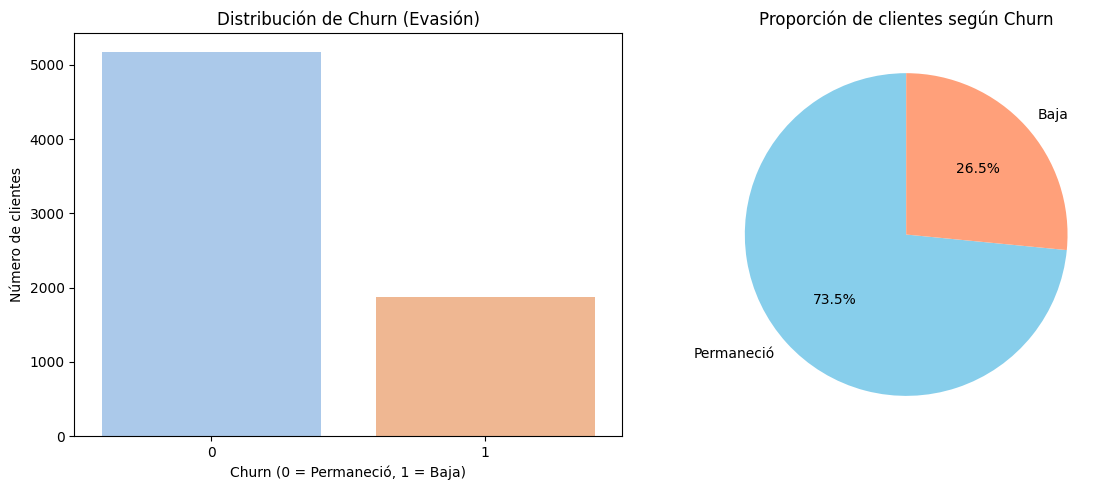

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
sns.countplot(
    data=df_clientes,
    x="Churn",
    palette="pastel",
    ax=axes[0]
)
axes[0].set_title("Distribución de Churn (Evasión)")
axes[0].set_xlabel("Churn (0 = Permaneció, 1 = Baja)")
axes[0].set_ylabel("Número de clientes")

# Gráfico circular
df_clientes["Churn"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["Permaneció", "Baja"],
    colors=["skyblue", "lightsalmon"],
    startangle=90,
    ax=axes[1]
)
axes[1].set_title("Proporción de clientes según Churn")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

En términos generales, a partir de los análisis anteriores se identifica que:

El 26,5% de los clientes han dejado el servicio. Esto indica que aproximadamente 1 de cada 4 clientes se da de baja, lo que representa un nivel significativo de rotación.

El 16,2% de los clientes son personas mayores (SeniorCitizen), menos de la mitad (48,3%) tienen pareja (Partner), y un 29,9% reporta tener dependientes.

El tiempo promedio de permanencia es de 32,37 meses, con una alta dispersión (desviación estándar 24,56 meses). El rango va desde nuevos clientes (0 meses) hasta 72 meses, con un 50% de clientes que llevan menos de 29 meses.

Servicios contratados:

El 90,3% cuenta con servicio telefónico.

Un 42,2% tiene múltiples líneas (MultipleLines).

Entre servicios adicionales, la adopción es baja: solo alrededor de un 28-34% de clientes tienen OnlineSecurity, OnlineBackup, DeviceProtection o TechSupport.

El streaming es usado por un 38% de clientes, tanto en TV como en películas.

El 59,2% utiliza facturación sin papel (PaperlessBilling).

Facturación:

El cargo mensual promedio es de 64,76 (mínimo 18,25 y máximo 118,75).

El cargo total promedio asciende a 2.279,73, con gran variabilidad (desviación estándar 2.266,79 y coeficiente de variación ≈ 99,4%), lo que indica diferencias importantes en permanencia y consumo.

Uso diario (Cuentas_Diarias): El promedio es de 2,16 cuentas diarias, con un rango entre 0,61 y 3,96, mostrando un coeficiente de variación similar al de los cargos mensuales (46,46%).

#### **Recuento de evasión por variables categóricas**

In [20]:
# Con género
tabla_genero = pd.crosstab(df_clientes["gender"], df_clientes["Churn"], normalize="index") * 100
print(tabla_genero.round(1))

Churn      0     1
gender            
female  73.1  26.9
male    73.8  26.2


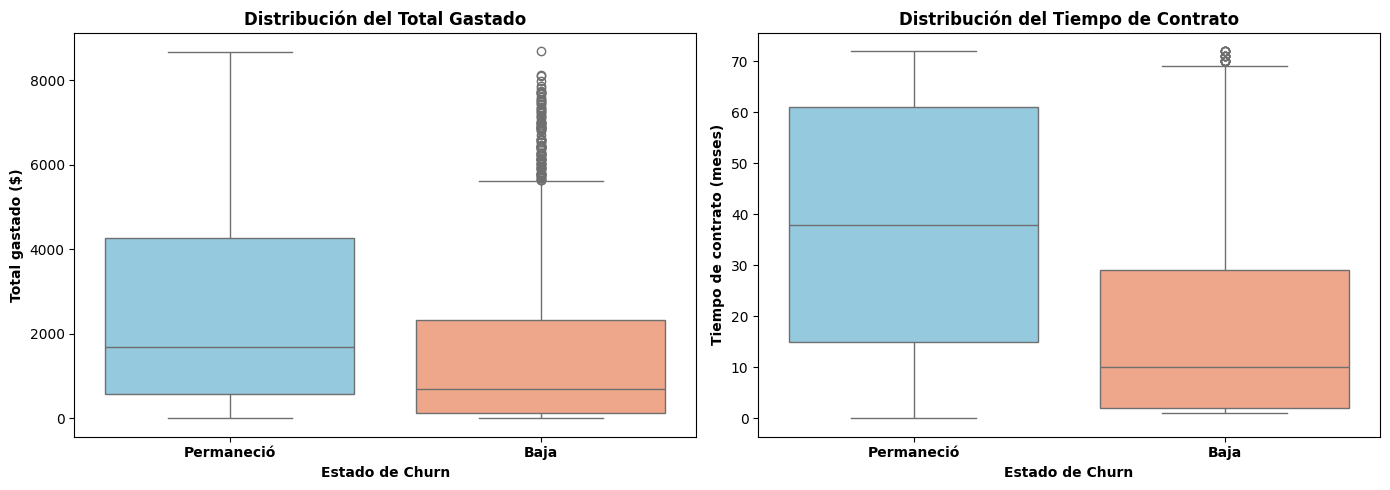

In [21]:
# Variables numéricas a explorar
variables_num = ["Charges-Total", "tenure"]

# Títulos y etiquetas
titulos_num = {
    "Charges-Total": "Distribución del Total Gastado",
    "tenure": "Distribución del Tiempo de Contrato"
}

etiquetas_x_num = {
    "Charges-Total": "Estado de Churn",
    "tenure": "Estado de Churn"
}

etiquetas_y_num = {
    "Charges-Total": "Total gastado ($)",
    "tenure": "Tiempo de contrato (meses)"
}

fig, axes = plt.subplots(1, len(variables_num), figsize=(14, 5))

for i, var in enumerate(variables_num):
    ax = sns.boxplot(
        data=df_clientes,
        x="Churn",
        y=var,
        palette=["skyblue", "lightsalmon"],
        ax=axes[i]
    )

    # Cambiar etiquetas de eje X
    ax.set_xticklabels(["Permaneció", "Baja"], weight='bold')

    # Títulos y etiquetas
    ax.set_title(titulos_num[var], fontsize=12, weight='bold')
    ax.set_xlabel(etiquetas_x_num[var], fontsize=10, weight='bold')
    ax.set_ylabel(etiquetas_y_num[var], fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

### **4. Informe final**

#### **Introducción**

El presente análisis tuvo como objetivo comprender los patrones asociados a la **evasión de clientes** (churn) en una empresa de telecomunicaciones.  
El problema de churn representa una pérdida significativa de ingresos y la necesidad de atraer nuevos clientes, lo que suele ser más costoso que retener a los actuales.  
A través de este estudio, buscamos identificar variables y comportamientos que influyen en la cancelación del servicio, con el fin de proponer estrategias efectivas de retención.

#### **Limpieza y tratamiento de datos**

1. **Importación de datos:** Se cargó el conjunto de clientes desde la base proporcionada.
2. **Depuración de valores nulos:** Se identificaron y eliminaron registros con valores ausentes en variables clave.
3. **Conversión de tipos de datos:** Columnas como `tenure`, `TotalCharges` y variables categóricas fueron convertidas al tipo de dato correcto.
4. **Codificación de variables:** Variables como `Churn` fueron transformadas a formato binario (`Yes`=1, `No`=0) para análisis estadístico y modelado.
5. **Filtrado de datos atípicos:** Se eliminaron o ajustaron valores extremos no representativos.


#### **Análisis exploratorio de datos**

**Gráficos y visualizaciones clave**
- **Histogramas y diagramas de barras** para distribución de variables categóricas y numéricas.
- **Matriz de correlación** para identificar relaciones con churn.

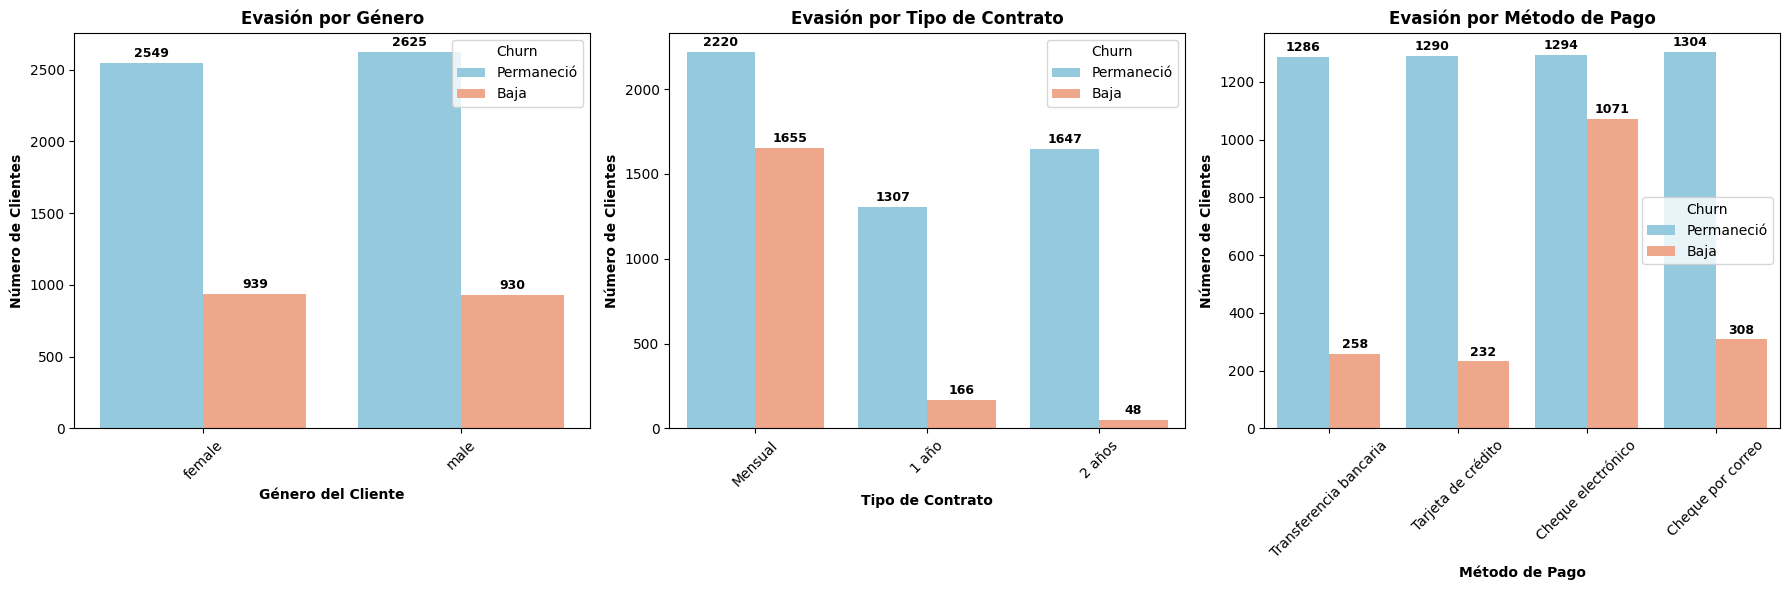

In [22]:
variables_cat = ["gender", "Contract", "PaymentMethod"]

# Diccionario con títulos y etiquetas de ejes
titulos = {
    "gender": "Evasión por Género",
    "Contract": "Evasión por Tipo de Contrato",
    "PaymentMethod": "Evasión por Método de Pago"}

etiquetas_x = {
    "gender": "Género del Cliente",
    "Contract": "Tipo de Contrato",
    "PaymentMethod": "Método de Pago"}

# Traducciones de categorías
traducciones = {
    "gender": {"Male": "Hombre", "Female": "Mujer"},
    "Contract": {"Month-to-month": "Mensual", "One year": "1 año", "Two year": "2 años"},
    "PaymentMethod": {
        "Electronic check": "Cheque electrónico",
        "Mailed check": "Cheque por correo",
        "Bank transfer (automatic)": "Transferencia bancaria",
        "Credit card (automatic)": "Tarjeta de crédito"}}

fig, axes = plt.subplots(1, len(variables_cat), figsize=(18, 6))

for i, var in enumerate(variables_cat):
    ax = sns.countplot(
        data=df_clientes,
        x=var,
        hue="Churn",
        palette=["skyblue", "lightsalmon"],
        ax=axes[i])

    # Cambiar etiquetas del eje X
    etiquetas_actuales = [cat.get_text() for cat in ax.get_xticklabels()]
    etiquetas_traducidas = [
        traducciones[var].get(et, et) for et in etiquetas_actuales]

    ax.set_xticklabels(etiquetas_traducidas, rotation=45)

    # Etiquetas sobre las barras
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", padding=2, fontsize=9, weight='bold')

    # Títulos y ejes
    ax.set_title(titulos[var], fontsize=12, weight='bold')
    ax.set_xlabel(etiquetas_x[var], fontsize=10, weight='bold')
    ax.set_ylabel("Número de Clientes", fontsize=10, weight='bold')
    ax.legend(title="Churn", labels=["Permaneció", "Baja"])

plt.tight_layout()
plt.show()

**Distribución de categorías**
- **Género:**  
  - Masculino: **50.48%**  
  - Femenino: **49.52%**  
  → La distribución es equilibrada, sin sesgo significativo por género.

- **Servicio de Internet:**  
  - Fibra óptica: **43.96%**  
  - DSL: **34.37%**  
  - Sin servicio: **21.67%**  
  → La mayoría cuenta con servicio de internet, destacando la fibra óptica.

- **Tipo de contrato:**  
  - Mes a mes: **55.02%**  
  - Dos años: **24.07%**  
  - Un año: **20.91%**  
  → Los contratos mensuales dominan y suelen asociarse con mayor probabilidad de cancelación.

- **Método de pago:**  
  - Cheque electrónico: **33.58%**  
  - Cheque por correo: **22.89%**  
  - Transferencia automática: **21.92%**  
  - Tarjeta de crédito automática: **21.61%**  
  → El cheque electrónico es el método más común, con tendencia a mayor churn.





#### **Conclusiones e insights**

1. **El tipo de contrato** es un factor determinante: los contratos mensuales presentan mayor evasión que los de largo plazo.
2. **El método de pago** influye: clientes que pagan mediante cheque electrónico muestran tasas de churn más altas.
3. **La permanencia (tenure)** está directamente relacionada con la retención: clientes nuevos son más propensos a cancelar.
4. **El servicio de internet** puede influir en la satisfacción: los usuarios de fibra óptica muestran una proporción elevada en el total, por lo que su experiencia es clave.
5. **El género** no parece ser un factor decisivo para el churn.

El alto coeficiente de variación en variables como Charges-Total y tenure confirma la heterogeneidad de la base de clientes: algunos contratan el servicio por períodos cortos con cargos bajos, mientras que otros acumulan altos costos a lo largo de varios años.

La baja adopción de servicios adicionales como OnlineSecurity o TechSupport podría estar relacionada con el abandono del servicio, ya que estos productos suelen generar mayor fidelización.

El perfil del cliente promedio es alguien con servicio telefónico, sin múltiples líneas, con permanencia moderada, y que paga cargos mensuales intermedios.

La tasa de abandono del 26,5% refuerza la necesidad de diseñar estrategias de retención, especialmente en clientes de bajo tenure y sin servicios complementarios.

#### **Recomendaciones**

1. **Fomentar contratos a largo plazo:** ofrecer descuentos o beneficios adicionales por contratos anuales o bianuales.
2. **Optimizar el servicio y la experiencia del cliente** en los primeros meses para reducir cancelaciones tempranas.
3. **Analizar la experiencia de los usuarios de fibra óptica** para detectar posibles problemas de servicio.
4. **Promover métodos de pago automáticos** mediante incentivos, para mejorar la retención.
5. **Implementar un programa de fidelización** según antigüedad y tipo de servicio contratado.

